In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
##bias version
p1=np.load('pval_bias_H0_T_0.npy')
p2 =np.load('pval_bias_H0_T_1.npy')
p3 =np.load('pval_bias_H0_T_2.npy')
(p1<=0.05).mean(),(p2<=0.05).mean(),(p3<=0.05).mean()

(0.0584, 0.107, 0.1008)

In [3]:
##debias version
p4=np.load('pval_debias_H0_T_0.npy')
p5 =np.load('pval_debias_H0_T_1.npy')
p6 =np.load('pval_debias_H0_T_2.npy')
(p4<=0.05).mean(),(p5<=0.05).mean(),(p6<=0.05).mean()

(0.0364, 0.0544, 0.0392)

In [4]:
import pandas as pd

In [5]:
tau_lst = [0.25,0.5,0.75,1.0,0.125,0.375]

T_lst=[50,100,500]

In [10]:
p1lst = []
p2lst = []
for a in range(len(tau_lst)):
    for b in range(len(T_lst)):
        tau = tau_lst[a]
        T =T_lst[b]# sample size
        p1now = np.load('pval_debias' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
        p2now=np.load('pval_bias' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
        p1lst.append((tau,np.rint(T) , np.mean(p1now<=0.05) ))
        p2lst.append((tau,np.rint(T) , np.mean(p2now<=0.05)))


[(0.25, 50.0, 0.0928),
 (0.25, 100.0, 0.2894),
 (0.25, 500.0, 0.9694),
 (0.5, 50.0, 0.9032),
 (0.5, 100.0, 1.0),
 (0.5, 500.0, 1.0),
 (0.75, 50.0, 1.0),
 (0.75, 100.0, 1.0),
 (0.75, 500.0, 1.0),
 (1.0, 50.0, 1.0),
 (1.0, 100.0, 1.0),
 (1.0, 500.0, 1.0),
 (0.125, 50.0, 0.0338),
 (0.125, 100.0, 0.0628),
 (0.125, 500.0, 0.141),
 (0.375, 50.0, 0.4068),
 (0.375, 100.0, 0.9104),
 (0.375, 500.0, 1.0)]

In [11]:
p1lst.append((0,np.rint(50),0.0364))
p1lst.append((0,np.rint(100),0.0544))
p1lst.append((0,np.rint(500),0.0392))
p2lst.append((0,np.rint(50),0.0584))
p2lst.append((0,np.rint(100), 0.107))
p2lst.append((0,np.rint(500), 0.1008))

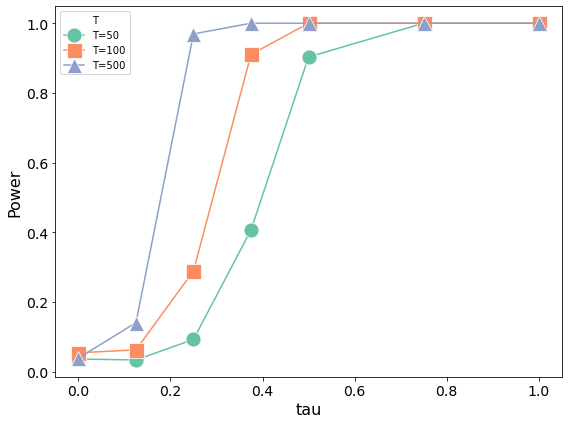

In [6]:

# Assuming p1lst is defined and contains your data
p1_array = np.array(p1lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p1_df = pd.DataFrame(p1_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p1_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in sphere', fontsize=15)
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='T')
plt.tight_layout()


plt.savefig('Power_sphere.png',facecolor='w')

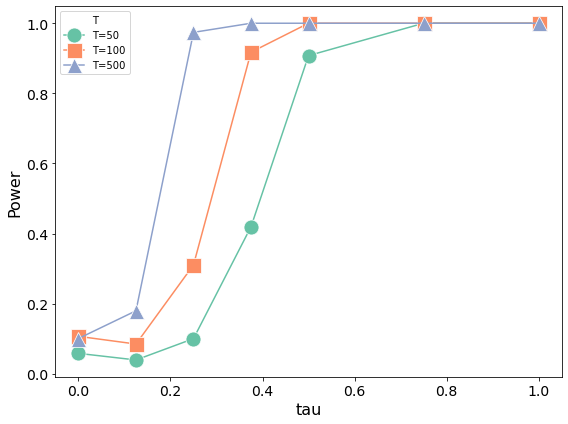

In [12]:

# Assuming p1lst is defined and contains your data
p2_array = np.array(p2lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p2_df = pd.DataFrame(p2_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p2_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in sphere', fontsize=15)
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='T')
plt.tight_layout()


plt.savefig('Power_sphere_B1.png',facecolor='w')

In [13]:
p2_df

,tau,T,p
0,0.250,50.0,0.1004
1,0.250,100.0,0.3106
2,0.250,500.0,0.9740
3,0.500,50.0,0.9076
4,0.500,100.0,1.0000
5,0.500,500.0,1.0000
6,0.750,50.0,1.0000
7,0.750,100.0,1.0000
8,0.750,500.0,1.0000
9,1.000,50.0,1.0000


In [21]:
p1spd=np.load('/Users/junhaozhu/Code/Manifold_TS/Dec_15_SPD=3_power/pval_bias_tau_0_T_0.npy')
p2spd=np.load('/Users/junhaozhu/Code/Manifold_TS/Dec_15_SPD=3_power/pval_debias_tau_0_T_0.npy')

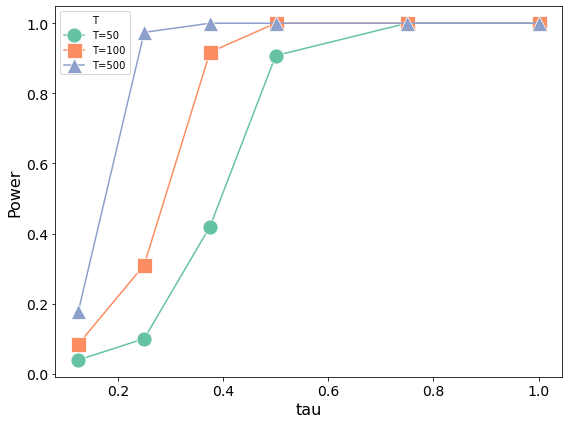

In [6]:
p2_array = np.array(p2lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p2_df = pd.DataFrame(p2_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p2_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in sphere', fontsize=15)
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='T')
plt.tight_layout()


#plt.savefig('Power_sphere.png',facecolor='w')